
# Diseño de software para cómputo científico

----

## Unidad 2: Testing


## Property base testing

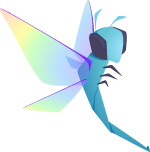

Paper seminal:

> Claessen, K., & Hughes, J. (2011). QuickCheck: a lightweight tool for random testing of Haskell programs. Acm sigplan notices, 46(4), 53-64.


<small>Fuente: <a href="https://www.freecodecamp.org/news/intro-to-property-based-testing-in-python-6321e0c2f8b/">https://www.freecodecamp.org/news/intro-to-property-based-testing-in-python-6321e0c2f8b/</a></small>

## Part 1: Example-based testing

- Given a test input `I`
- When passed to function under test
- should return an output `O`

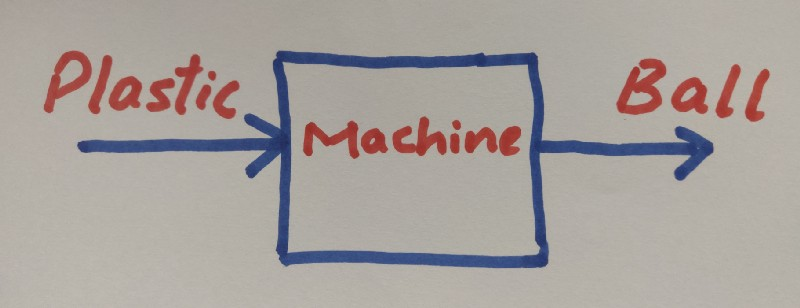

Probemos esta máquina con testing basado en ejemplos

- take a blue-coloured raw plastic (fixed test data)
- feed the plastic to machine
- expect a blue-coloured plastic ball as output (fixed test output)

## Lo mismo pero con un programa

In [14]:
# test_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


def test_sum():
    assert sum(1, 2) == 3


## Este test es suficiente para **validar** la funcionalidad de `sum()`?

- La respuesta simple es no.
- Podemos usar parametrización de pytest para mejorar esto

In [15]:
# test_param_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


import pytest


@pytest.mark.parametrize(
    'num1, num2, expected',
    [(3, 5, 8), (-2, -2, -4), (-1, 5, 4), (3, -5, -2), (0, 5, 5)]
)
def test_sum(num1, num2, expected):
    assert sum(num1, num2) == expected

Pero es esencialmente más de lo mismo. Lo cual nos lleva a al primer problema de los testings basados en ejemplos

## Issue 1: La exhaustividad depende de la persona que escribe los tests

- La persona puede querer escribir 5, 50 o 500 tests.
- Pero nunca puede estar seguro si logro probar todo. (sobre todos los edge cases)

Lo cual nos lleva al segundo problema

##  Issue 2: Los tests no son robustos por el entendimiento ambiguo de los requerimientos


Nos dieron todos los detalles de la función sum?


- Que tipo de input espera la función?
- Como debe comportarse la funcion frente a inputs inesperados?
- Que tipo de output debe retornar nuestra función?



##  Issue 2: Los tests no son robustos por el entendimiento ambiguo de los requerimientos


O si lo ponemos en contexto de nuestro código:

- `num1` y `num2` tienen que ser `int` o `float`? pueden ser `str`?
- Hay cotas minimas y maximas para `num1` y `num2`?
- Como manejo `None`?
- El retorno tiene que ser `int` o `float`?
- Cuales ecenarios justifican mensajes de errores?
- Hay algun ecenario donde pueda engañar al test?

In [7]:
# test_buggy_example.py

def sum(num1, num2):
    """Buggy logic"""
    results = {
        (3, 5): 8, (-2, -2): -4, 
        (-1, 5): 4, (3, -5): -2, (0, 5): 5}
    return results.get((num1, num2))

import pytest


@pytest.mark.parametrize(
    'num1, num2, expected',
    [(3, 5, 8), (-2, -2, -4), (-1, 5, 4), (3, -5, -2), (0, 5, 5)])
def test_sum(num1, num2, expected):
    assert sum(num1, num2) == expected

## Part 2: Property-based testing

- Los frameworks de Property based testing frameworks verifican la veracidad de propiedades
- Una propiedad es un statement del tipo:

```python
    for all (x, y, …)
    such as precondition(x, y, …) holds
    property(x, y, …) is true.
```

Asi el *aproach* en propiedades para la maquina de hacer pelotas seria:

- Dada una gran coleccion de plasticos.
- Aseguraque todos este coloreados.
- Y la salida tiene que tener las siguientes propiedades:
    - Es esferica.
    - Es coloreada con el mismo color del input.

## Hypotesis testing

In [8]:
!pip install hypothesis

     |████████████████████████████████| 337 kB 1.2 MB/s eta 0:00:01


In [6]:
# test_property_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


from hypothesis import given
from hypothesis import strategies as st


@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, num2) == num1 + num2

In [7]:
!pytest code/test_example.py -s

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.0.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/juan/proyectos/dis_ssw/src/clase09
plugins: hypothesis-5.35.4
collected 1 item                                                               

code/test_example.py .

============================== 1 passed in 0.01s ===============================


## Hypotesis testing - Verbose

In [2]:
# test_property_v_example.py

from hypothesis import given, settings, Verbosity, example
from hypothesis import strategies as st

@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
@example(1, 2)
def test_sum(num1, num2):
    assert sum(num1, num2) == num1 + num2

In [4]:
!pytest code/test_property_v_example.py -v -s

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.0.2, py-1.9.0, pluggy-0.13.1 -- /home/juan/proyectos/dis_ssw/bin/python
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/home/juan/proyectos/dis_ssw/src/clase09/.hypothesis/examples')
rootdir: /home/juan/proyectos/dis_ssw/src/clase09
plugins: hypothesis-5.35.4
collected 1 item                                                               

code/test_property_v_example.py::test_sum Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=-792017313, num2=-64,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=0, num2=0,
)
Trying example: test_sum(
    num1=-30834, num2=-45

## Las estrategias son desgraciadas

In [76]:
st.lists(st.text(), min_size=5, unique=True).example()

['Ô\x9b6\U00012a49\x0b¬\x8aS',
 'J½\x07Õ·\U00108690x\U00058e68Ì~\U000a3714¼',
 'XE®%¿',
 '',
 '\U000d0781\x84',
 '\U0003d6bc®²\x12,ô']

In [84]:
st.dictionaries(st.characters(), st.floats(), min_size=3).example()

{'Ü': 2.6904513110582287e-269,
 '%': -9.85856544792709e+302,
 'Ì': 1.7976931348623157e+308,
 '¸': 0.5,
 'ð': nan,
 'Ë': -1.7976931348623157e+308,
 'µ': 2.00001,
 '\x86': nan,
 'ß': 0.5,
 'k': inf,
 '@': inf,
 '\U000915bb': 1e-05,
 '\r': inf,
 'Æ': 1e-05,
 'ñ': -1.1048271483651628e-42}

Sobre las estrategias: https://hypothesis.readthedocs.io/en/latest/data.html

## Hay estrategias para el stack científico

In [85]:
from hypothesis.extra import numpy as npst

npst.arrays(float, (3, 4), elements=None, fill=None, unique=True).example()

array([[-3.40282347e+038,  1.79769313e+308, -1.10000000e+000,
                     nan],
       [ 0.00000000e+000,  1.26499333e+036, -1.79769313e+308,
                     nan],
       [-3.86277727e+141,  5.00000000e-001,  6.43702901e+016,
         1.89953887e-001]])

In [106]:
from hypothesis.extra import pandas as pdst

pdst.data_frames([
    pdst.column('A', dtype=int, unique=True), 
    pdst.column('B', dtype=float, unique=True)]).example()

,A,B
0,52684,1.000000e-05
1,123,-2.000010e+00
2,-1864068193275930592,-9.007199e+15
3,-214,inf
4,2966081929727527613,4.156029e-240
5,-184,NaN
6,-65217,2.243493e-09


## Pensando en propiedades reales

- Al parecer la suma es conmutativa.
- Sumar cero a un valor devuelve el mismo valor

In [ ]:
from hypothesis import given, settings, Verbosity
from hypothesis import strategies as st

@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, 0) == num1
    assert sum(0, num2) == num2
    assert sum(num1, num2) == sum(num2, num1)
    assert sum(num1, num2) - num1 == num2

## Shrinking

- Hasta ahora todo es razonable de programar.
- Pero la inferencia es solo parte del truco.

In [ ]:
@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, 0) == num1
    assert sum(num1, num2) == sum(num2, num1)
    assert num1 <= 30

Hypotesis trata de encontrar el ejemplo minimo entendible para un ser humano

### Estrategias custom

In [121]:
import attr

@attr.s(hash=True)
class Persona:
    name: str = attr.ib()
    edad: int = attr.ib()
        

In [122]:
PersonaStrategy = st.lists(st.builds(
  Persona,
  st.text(min_size=5, max_size=10),
  st.integers(min_value=0, max_value=80)), min_size=3, unique=True)

In [130]:
PersonaStrategy.example()

[Persona(name='\U0005c188NW6\x06$ \x16î¢', edad=44),
 Persona(name='W\U000c55e5\U000431fb%l\x01\U000347e5\U0006bdf1\x1eÌ', edad=18),
 Persona(name='©âÁ*\x1a', edad=79),
 Persona(name='úAÍ\x9bn\x9b@\x90\U000adb99ó', edad=75),
 Persona(name='çK\U000ff92d\x17ÑsO', edad=34),
 Persona(name='\x8c2\x9e.à½\U000c9d39\U000e40e0\x1aW', edad=61)]

### Estrategias custom (con composición)

In [132]:
@attr.s(hash=True)
class Persona:
    name: str = attr.ib()
    edad: int = attr.ib()
    mayor_de_edad: bool = attr.ib()

In [134]:
@st.composite
def persona_stategy(draw):
    name = draw(st.text(min_size=5, max_size=80))
    age = draw(st.integers(min_value=0, max_value=17))
    mayor_de_edad = draw(st.booleans())
    return Persona(name, age, mayor_de_edad)


In [158]:
persona_stategy().example()

Persona(name='\xad0000', edad=0, mayor_de_edad=False)